## Εργασία 1 ##

Καλωσήρθατε στην πρώτη σας εργασία. Η εργασία αυτή έχει σκοπό να σας βοηθήσει να εμπεδώσετε τα γραμμικά μοντέλα.

Τα Jupyter Notebooks είναι αλληλεπιδραστικά περιβάλλοντα προγραμματισμού ενσωματωμένα σε μια ιστοσελίδα. Στο μάθημα "Μηχανική Μάθηση" τα χρησιμοποιούμε στο πρακτικό μέρος του μαθήματος.

Στην εργασία αυτή θα πρέπει να συμπληρώσετε κώδικα Python 3 στα σημεία που αναφέρουν # YOUR CODE HERE. Μην τροποποιείτε τον κώδικα που βρίσκεται εκτός αυτών των περιοχών.

Πρωτού παραδόσετε την εργασία σας σιγουρευτείτε ότι ο κώδικας σε όλα τα κελιά τρέχει σωστά. Για το σκοπό αυτό επιλέξτε από το μενού **Χρόνος εκτέλεσης (runtime) -> Επανεκίνηση περιόδου λειτουργίας και εκτέλεση όλων**.

Συμπληρώστε το όνομα (**NAME**) και το **AEM** σας παρακάτω:

In [1]:
NAME = "Παπαδάκης Κωνσταντίνος Φώτιος"
AEM = "10371"

## Μέρος Α: 5 μονάδες ##

Σε αυτό το μέρος της άσκησης θα χτίσουμε ένα μοντέλο γραμμικής παλινδρόμησης από το μηδέν.

**Α1 (1 μονάδα):** Υλοποιήστε τη σιγμοειδή συνάρτηση $\sigma(z)= \dfrac{1}{1 + exp(-z)}$ με τη NumPy.

In [7]:
import numpy as np

def sigmoid(z):
    """Υπολογίζει τη σιγμοειδή συνάρτηση."""
    # Sigmoid function
    sigma=1/(1+np.exp(-z))
    return sigma
    

In [2]:
"""Τεστ ορθού υπολογισμού σιγμοειδούς."""
assert sigmoid(0) == 0.5
assert np.round(sigmoid(7),8) == 0.99908895
assert np.round(sigmoid(-1),8) == 0.26894142

**Α2 (4 μονάδες):** Υλοποιήστε κλάση για τον αλγόριθμο της λογιστικής παλινδρόμησης. Αρχικοποιήστε τις παραμέτρους σε μηδενικές τιμές. Αποθηκεύστε τες στο διάνυσμα στήλη theta. Η συνάρτηση fit πρέπει να δέχεται πίνακα X με τις τιμές των μεταβλητών εισόδου και διάνυσμα στήλη y με τις τιμές της μεταβλητής εξόδου. Η συνάρτηση predict πρέπει να δέχεται πίνακα Χ με τις τιμές των μεταβλητών εισόδου.

In [34]:
class MyLogisticRegression:
    def __init__(self, num_iterations=2000, learning_rate=0.004):
      self.theta = None
      self.num_iterations = num_iterations
      self.learning_rate = learning_rate

    def fit(self, X, y):
      """ Fit the model according to the given training data. """
      # Number of training examples and features m: number of training examples, n: number of features
      m, n = X.shape  
      # Add bias term to X
      X = np.c_[np.ones((m, 1)), X]  # Add a column of ones
      # Initialize theta with zeros
      self.theta = np.zeros((n+1, 1))

      # Weight calculation
      for _ in range(self.num_iterations):
        # Calculate hypothesis
        hypothesis = sigmoid(np.dot(X,self.theta))
        # Calculate gradient
        gradient = (1/m) * np.dot(X.T, (hypothesis - y))
        # Update weights
        self.theta = self.theta - self.learning_rate * gradient

    def predict(self, X):
      """Predict class labels for input X"""
      X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
      # Calculate the hypothesis
      hypothesis = sigmoid(np.dot(X, self.theta))
      # Predict class
      return (hypothesis >= 0.5).astype(int)

        


In [35]:
"""Τεστ ορθής λειτουργίας fit"""
from sklearn.datasets import make_blobs

# δημιουργία δύο ομάδων από τυχαία σημεία με κέντρο 0,0,0 και 3,3,3 και τυπική απόκλιση 1
centers = [[0.0, 0.0, 0.0], [3.0, 3.0, 3.0]]
X, y = make_blobs(n_samples=200, centers=centers,
                  random_state=47, shuffle=False)
y = np.array(y).reshape(-1,1)

lr = MyLogisticRegression()
lr.fit(X, y)

assert np.allclose(lr.theta, np.array([[-1.1772064],[0.5026043],[0.40811666],[0.55685573]]))

In [36]:
"""Τεστ ορθής λειτουργίας predict"""
from sklearn.datasets import make_blobs

# δημιουργία δύο ομάδων από τυχαία σημεία με κέντρο 0,0,0 και 3,3,3 και τυπική απόκλιση 1
centers = [[0.0, 0.0, 0.0], [3.0, 3.0, 3.0]]
X, y = make_blobs(n_samples=200, centers=centers,
                  random_state=47, shuffle=False)
y = np.array(y).reshape(-1,1)

lr = MyLogisticRegression()
lr.fit(X, y)

assert np.allclose(lr.predict(X[[0,199],:]), np.array([[0],[1]]))

## Μέρος B: Χρήση μοντέλου στο σύνολο digits (3 μονάδες)

Σε αυτό το μέρος θα δουλέψουμε με το σύνολο δεδομένων digits (https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset), το οποίο αφορά μια εργασία αναγνώρισης ψηφίων (0 έως 9) από δυαδικές εικόνες  διαστάσεων 32x32 με χειρόγραφα ψηφία, οι οποίες χωρίστηκαν σε 64 (8x8) τμήματα των 4x4 δυαδικών στοιχείων, και σε κάθε ένα από αυτά τα 64 τμήματα μετρήθηκαν πόσα από τα 16 (4x4) στοιχεία είχε τιμή 1.

Αρχικά θα φορτώσουμε τα δεδομένα

In [48]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

**Β1**: Χρησιμοποιήστε την κλάση OneVsOneClαssifier της sklearn σε συνδυασμό με την κλάση LogisticRegression για να εκπαιδεύσετε ένα μοντέλο λογιστικής παλινδρόμησης για κάθε ζεύγος κλάσης. Χρησιμοποιήστε προκαθορισμένες ρυθμίσεις στις παραμέτρους της κλάσης LogisticRegression, αλλά θέστε τον μέγιστο αριθμό επαναλήψεων σε 1000 και την παράμετρο random_state σε 42. Ονομάστε ovo το αντικείμενο της κλάσης.

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

# Create the OneVsOneClassifier with MyLogisticRegression
ovo = OneVsOneClassifier(MyLogisticRegression(num_iterations=1000, learning_rate=0.004))


In [53]:
#έλεγχος ορθής λειτουργίας
assert len(ovo.estimators_) == 45
assert ovo.estimators_[0].coef_.shape == (1, 64)

AttributeError: 'OneVsOneClassifier' object has no attribute 'estimators_'

**Β2**: Χρησιμοποιήστε την κλάση OneVsRestClαssifier της sklearn σε συνδυασμό με την κλάση LogisticRegression για να εκπαιδεύσετε ένα μοντέλο λογιστικής παλινδρόμησης για κάθε κλάση. Χρησιμοποιήστε προκαθορισμένες ρυθμίσεις στις παραμέτρους της κλάσης LogisticRegression, αλλά θέστε τον μέγιστο αριθμό επαναλήψεων σε 1000 και την παράμετρο random_state σε 42. Ονομάστε ovr το αντικείμενο της κλάσης.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#έλεγχος ορθής λειτουργίας
assert len(ovr.estimators_) == 10
assert ovr.estimators_[0].coef_.shape == (1, 64)

**Β3**: Ορίστε συνάρτηση που δέχεται ένα μοντέλο, και ένα σύνολο δεδομένων, συγκρίνει τις πραγματικές τιμές της μεταβλητής εξόδου με τις προβλέψεις του μοντέλου χρησιμοποιώντας τη συνάρτηση predict του μοντέλου και επιστρέφει τους δείκτες των παραδειγμάτων τα οποία το μοντέλο ταξινομεί εσφαλμένα.

In [ ]:
def find_misclassified(classifier, input, output):
  # YOUR CODE HERE
  raise NotImplementedError()

In [ ]:
#έλεγχος ορθής λειτουργίας
output = find_misclassified(ovr, X, y)
expected = np.array([524, 890, 1553, 1658])
np.testing.assert_array_equal(output, expected)

Μια εικόνα που δεν τα πάει καλά το μοντέλο είναι η 525η με δείκτη 524. Το μοντέλο προβλέπει τον αριθμό 3, ενώ η εικόνα (υποτίθεται ότι) απεικονίζει τον αριθμό 8.

In [ ]:
print(ovr.predict(X[524:525]))
print(y[524:525])

Εμφανίζοντας την εικόνα μπορούμε να διαπιστώσουμε γιατί δυσκολεύεται το μοντέλο με τα ίδια μας τα μάτια.

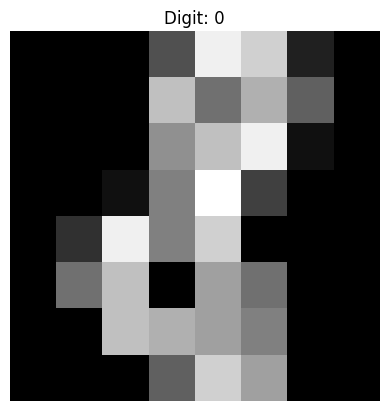

In [2]:
from matplotlib import pyplot as plt

image = digits.images[524]

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Digit: {digits.target[0]}')  # Show the corresponding label
plt.axis('off')  # Turn off the axis labels
plt.show()

**Β4**: Τέλος χρησιμοποιήστε την κλάση LogisticRegression απο μόνη της για να εκπαιδεύσετε ένα μοντέλο πολυχοτομικής λογιστικής παλινδρόμησης. Χρησιμοποιήστε προκαθορισμένες ρυθμίσεις στις παραμέτρους της κλάσης LogisticRegression, αλλά θέστε τον μέγιστο αριθμό επαναλήψεων σε 1000 και την παράμετρο random_state σε 42.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#έλεγχος ορθής λειτουργίας
assert clf.coef_.shape == (10, 64)

## Μέρος Γ: Χρήση μοντέλου στο σύνολο breast cancer (2 μονάδες)

Σε αυτό το μέρος θα δουλέψουμε με το σύνολο δεδομένων breast cancer (https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset), το οποίο αφορά την ταξινόμηση ψηφιακών εικόνων μικροσκοπίου με κύτταρα που έχουν εξαχθεί από μαστό μέσω βιοψίας με λεπτή βελόνα.

In [ ]:
from sklearn.datasets import load_breast_cancer
bca = load_breast_cancer()
X = bca.data
y = bca.target

Επειδή τα εύρη τιμών των μεταβλητών διαφέρουν, εφαρμόστε προτυποποίηση στα δεδομένα εισόδου.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#έλεγχος ορθής λειτουργίας
assert np.allclose(np.mean(X,axis=0), np.zeros(30), atol=0.01)

Παρακάτω εκπαιδεύουμε ένα μοντέλο λογιστικής παλινδρόμησης με προκαθορισμένες ρυθμίσεις στις παραμέτρους και παράμετρο random_state ίση με 42.

In [ ]:
clf = LogisticRegression(random_state=42)
clf.fit(X,y)

Υλοποιήστε συνάρτηση που δέχεται μοντέλο λογιστικής παλινδρόμησης δυαδικής ταξινόμησης σαν το παραπάνω καθώς και πίνακα συμβολοσειρών με τα ονόματα των μεταβλητών εισόδου και επιστρέφει τη σημαντικότερη μεταβλητή εισόδου.

In [ ]:
def best_feature(model, feature_names):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
#έλεγχος ορθής λειτουργίας
assert best_feature(clf, bca.feature_names) == 'worst texture'